In [2]:
import PullData
import pandas as pd

df = PullData.getData()

df['GEO'].unique()

array(['Canada', 'NL', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB',
       'BC', 'Total census metropolitan areas', "St. John's, NL",
       'Halifax, NS', 'Moncton, NB', 'Saint John, NB', 'Saguenay, QC',
       'Québec, QC', 'Sherbrooke, QC', 'Trois-Rivières, QC',
       'Montréal, QC', 'Ottawa-Gatineau, ON/QC',
       'Ottawa-Gatineau (QC part)', 'Ottawa-Gatineau (ON part)',
       'Kingston, ON', 'Peterborough, ON', 'Oshawa, ON', 'Toronto, ON',
       'Hamilton, ON', 'St. Catharines-Niagara, ON',
       'Kitchener-Cambridge-Waterloo, ON', 'Brantford, ON', 'Guelph, ON',
       'London, ON', 'Windsor, ON', 'Barrie, ON', 'Greater Sudbury, ON',
       'Thunder Bay, ON', 'Winnipeg, MB', 'Regina, SK', 'Saskatoon, SK',
       'Calgary, AB', 'Edmonton, AB', 'Kelowna, BC',
       'Abbotsford-Mission, BC', 'Vancouver, BC', 'Victoria, BC',
       'Non-census metropolitan areas'], dtype=object)

In [3]:
atlantic = ['NB','NS','NL','PE']
fuels = ['electricity', 'electric', 'natural gas', 'oil', 'wood or wood pellets', 'wood (excluding wood pellets)', 'propane', 'other']

def fueliff(x):
    return x in fuels
def deviceAllFuel(x):
    return x in (devices + devices_spcase)

def fixFuel(fuel_choice, x):
    return (fuel_choice in x) and (fuel_choice != x)


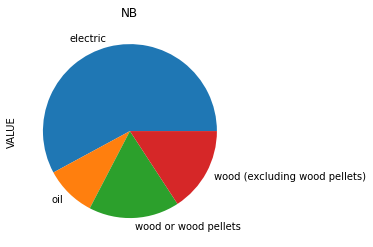

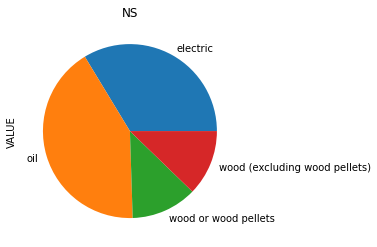

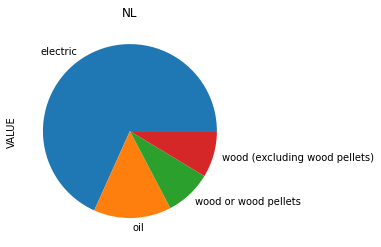

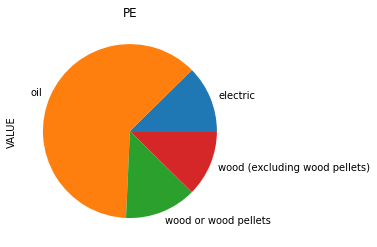

In [16]:
import matplotlib as pl
# fig = px.pie(df, values='tip', names='day')
for i in atlantic:    
    hold=df[(df['REF_DATE'] == 2017) 
           & (df['GEO'] == i) 
           & df['HEAT'].map(fueliff)]
    hold = hold.set_index('HEAT')
    hold.plot.pie(y='VALUE', legend=False, title = i)
    pl.pyplot.savefig(i)


In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

dpoints = {
    x : df[(df['GEO'] == x) & (df['REF_DATE'] == 2017) & df['HEAT'].map(fueliff)]
    for x in atlantic
}

# dpoints = { x : df[(df['REF_DATE'] == x) 
#                & (df['GEO'] == 'Ontario') 
#                & df['HEAT'].map(lambda x: fixFuel('electric', x))] for x in [2013,2015,2017]}

# Create subplots: use 'domain' type for Pie subplot
# fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
# y = 1
# for i in dpoints.keys():
#     fig.add_trace(
#         go.Pie(labels = dpoints[i]['HEAT'], values = dpoints[i]['VALUE'], name=str(i)), 1, y
#     )
#     y += 1
# fig.add_trace(go.Pie(labels=labels, values=[16, 15, 12, 6, 5, 4, 42], name="GHG Emissions"),
#               1, 1)
# fig.add_trace(go.Pie(labels=labels, values=[27, 11, 25, 8, 1, 3, 25], name="CO2 Emissions"),
#               1, 2)

# Use `hole` to create a donut-like pie chart
# fig.update_traces(hole=.4, hoverinfo="label+percent+name")

# fig.update_layout(
#     title_text="Global Emissions 1990-2011",
#     # Add annotations in the center of the donut pies.
#     annotations=[dict(text='GHG', x=0.18, y=0.5, font_size=20, showarrow=False),
#                  dict(text='CO2', x=0.82, y=0.5, font_size=20, showarrow=False)])
# fig.show()


In [27]:
fig = px.pie(
    dpoints['PE'],
            names = 'HEAT', values = 'VALUE')
fig.show()
fig.write_image("figPE.png")

ValueError: 
The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    /Users/benmacada/Python/3.7/bin/
    /Users/benmacadam/Python/3.7/bin/
    /Users/benmacadam/Library/Python/3.7/bin/
    /usr/local/bin
    /usr/bin
    /bin
    /usr/sbin
    /sbin

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca

After installation is complete, no further configuration should be needed.

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save()

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python


In [50]:
df

,GEO,colour
0,Quebec,0
1,Newfoundland and Labrador,1
2,British Columbia,2
3,New Brunswick,3
4,Nova Scotia,4
5,Saskatchewan,5
6,Alberta,6
7,Prince Edward Island,7
8,Manitoba,8
9,Ontario,9


KeyError: 0

In [52]:
import plotly.express as px
fig = px.choropleth(df, geojson=canada, color="colour",
                    locations='GEO', featureidkey="properties.name",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)